# Qredo tokenomics simulation - supply, inflation and TVL

### June 2023

- Scenario overview
- Circulating supply
- Yearly inflation rate
- Daily inflation rate
- Supply components (cumulative)
- Supply components (daily)
- TVL rate
- Staker APR
- Staker minimum weekly rewards
- Average rewards per validator
- Validator profit
- Ecosystem fund balance
- Ecosystem fund net flows

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
forecast_length = 365*3
outfolder = os.path.realpath("../data/sim_data")
month_int = 6

## Load data

In [3]:
# load
df_file = os.path.join(outfolder, f"final_sim_df.pickle")
with open(df_file, "rb") as fp:
    df = pickle.load(fp)

# process columns
df["date"] = df["iteration"].apply(lambda x: dt.datetime(2023, 6, 15)+dt.timedelta(days=x)).values
df["tvl_rate"] = df["staking_tvl"]/df["circ_supply"]
df["apr"] = 365.0*(df["total_staking_rewards"]-df["validators_rewards"])/df["staking_tvl"]
df["min_staker_week_reward"] = 2500*7*(df["apr"]/365)
df["av_validator_reward"] = df["validators_rewards"] / df["n_validators"]
df["validator_profit"] = df["av_validator_reward"] * df["token_price"] - 200.0

# convert units
mill_cols = ["circ_supply", 'day_vested', 'day_locked', 'day_released','day_burned','staking_rewards_vested',
             "total_staking_rewards", "validators_rewards","ecosystem_fund", "staking_tvl"]
df[mill_cols] = df[mill_cols]/(10**6)

len(df)

2956500

In [4]:
combined_df = df[(df["staking_scenario"]==df["usage_scenario"]) & (df["staking_scenario"]==df["token_scenario"])]

## Scenario Overview

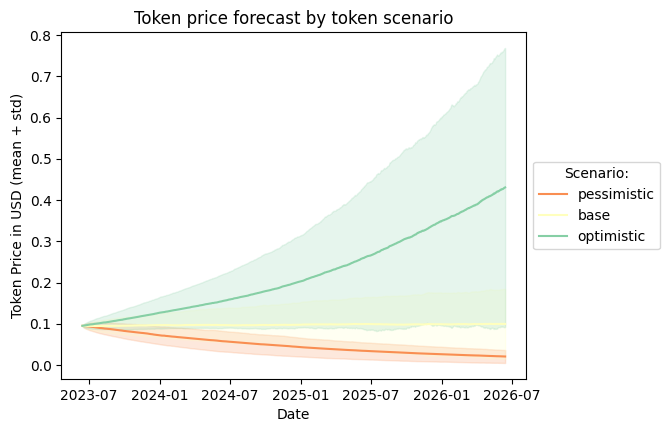

In [5]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="token_price", hue="token_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Token price forecast by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Token Price in USD (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

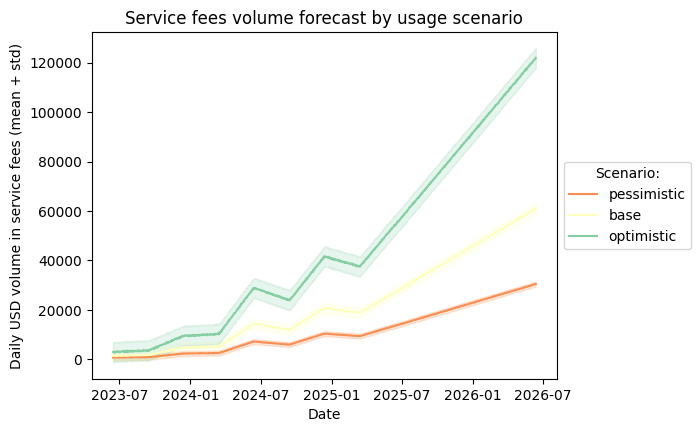

In [6]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="service_fees", hue="usage_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Service fees volume forecast by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Daily USD volume in service fees (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

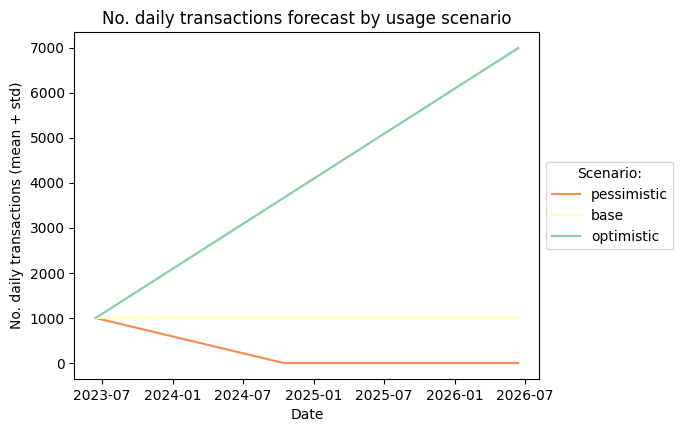

In [7]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="n_txs", hue="usage_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("No. daily transactions forecast by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("No. daily transactions (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

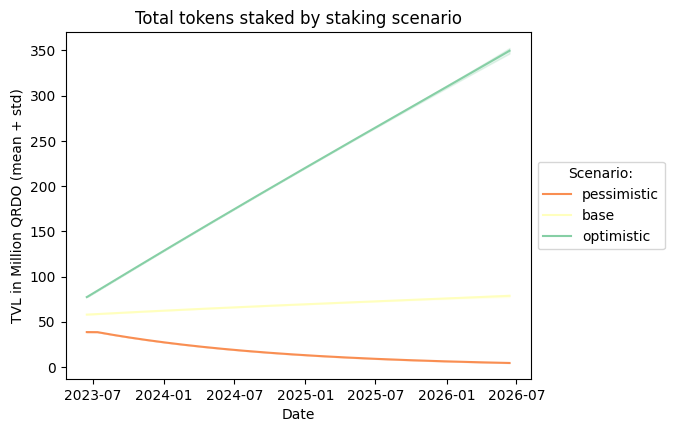

In [8]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="staking_tvl", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Total tokens staked by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("TVL in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

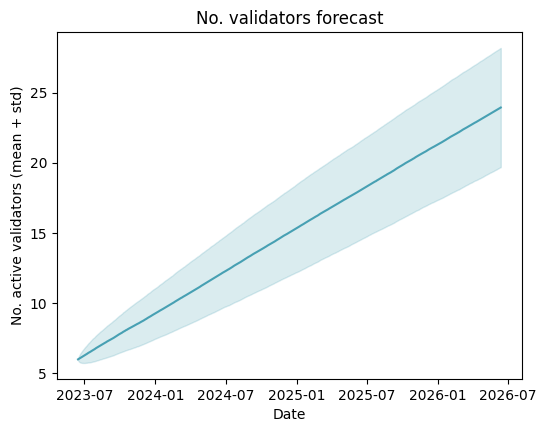

In [9]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="n_validators", errorbar="sd", c='#47a0b3')
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("No. validators forecast") 
plt.xlabel("Date") 
plt.ylabel("No. active validators (mean + std)")
plt.show()

## Circulating supply

In [10]:
df[df["iteration"]==0]["circ_supply"].agg(["mean", "std"])

mean    644.941665
std      30.541681
Name: circ_supply, dtype: float64

In [11]:
df[df["iteration"]==0]["staking_tvl"].agg(["mean", "std"])

mean    58.052356
std     15.802777
Name: staking_tvl, dtype: float64

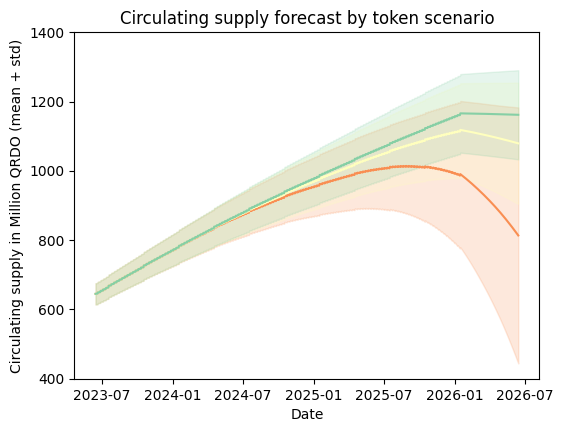

In [74]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="circ_supply", hue="token_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(400, 1400)
plt.title("Circulating supply forecast by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Circulating supply in Million QRDO (mean + std)")
fig.get_legend().remove()
plt.show()

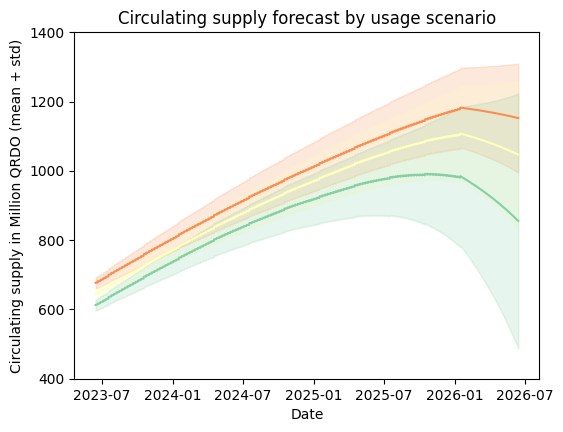

In [73]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="circ_supply", hue="usage_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(400, 1400)
plt.title("Circulating supply forecast by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Circulating supply in Million QRDO (mean + std)")
fig.get_legend().remove()
plt.show()

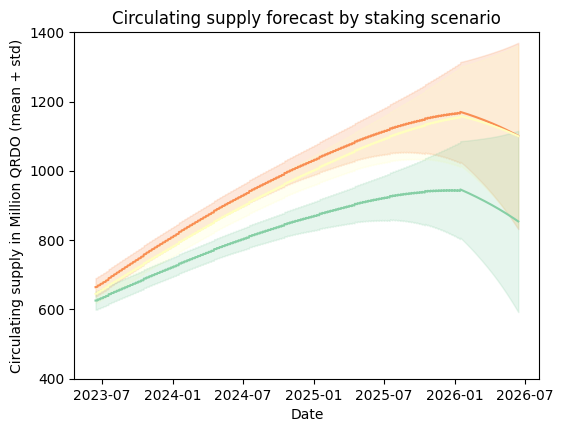

In [72]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="circ_supply", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(400, 1400)
plt.title("Circulating supply forecast by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Circulating supply in Million QRDO (mean + std)")
fig.get_legend().remove()
plt.show()

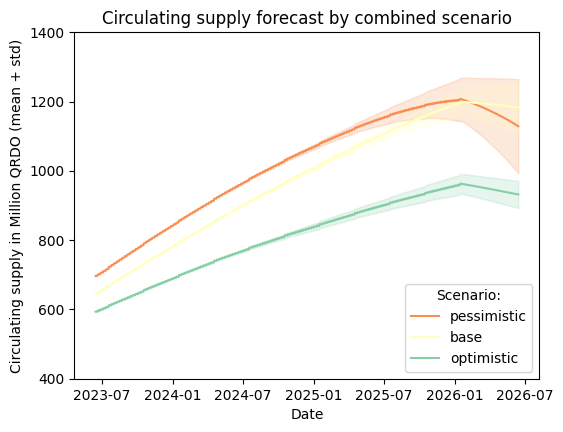

In [75]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df, x="date", y="circ_supply", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(400, 1400)
plt.title("Circulating supply forecast by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Circulating supply in Million QRDO (mean + std)")
plt.legend(loc='lower right', title="Scenario:")
plt.show()

## Yearly inflation rate

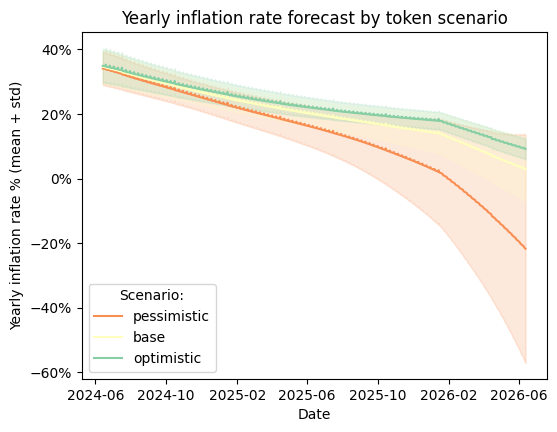

In [16]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="year_inflation", hue="token_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int-2))
plt.title("Yearly inflation rate forecast by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Yearly inflation rate % (mean + std)")
plt.legend(loc='lower left', title="Scenario:")
plt.show()

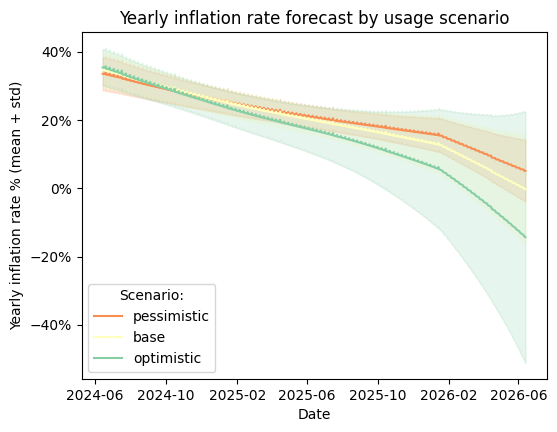

In [17]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="year_inflation", hue="usage_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int-2))
plt.title("Yearly inflation rate forecast by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Yearly inflation rate % (mean + std)")
plt.legend(loc='lower left', title="Scenario:")
plt.show()

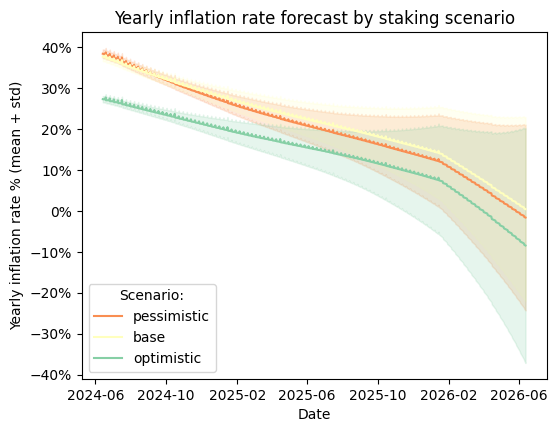

In [18]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="year_inflation", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int-2))
plt.title("Yearly inflation rate forecast by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Yearly inflation rate % (mean + std)")
plt.legend(loc='lower left', title="Scenario:")
plt.show()

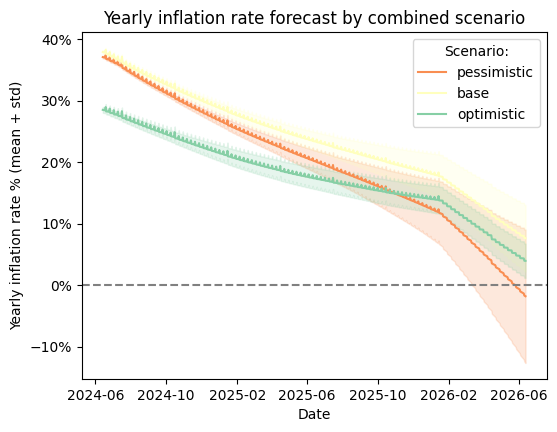

In [19]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df, x="date", y="year_inflation", hue="token_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int-2))
plt.axhline(y=0, color='grey', linestyle='--')
plt.title("Yearly inflation rate forecast by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Yearly inflation rate % (mean + std)")
plt.legend(loc='upper right', title="Scenario:")
plt.show()

## Daily inflation rate

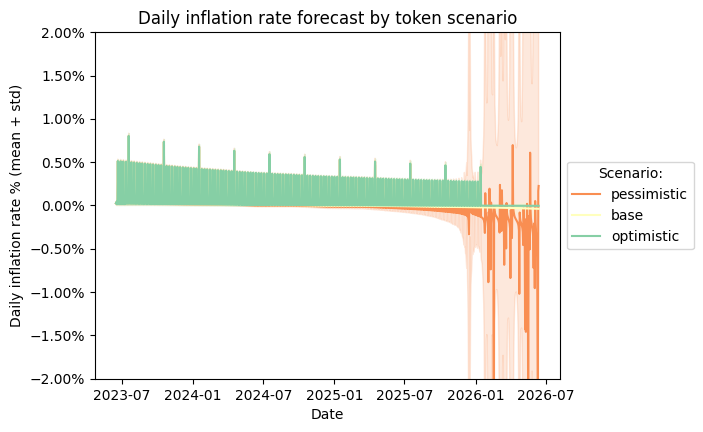

In [20]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="day_inflation", hue="token_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(-0.02, 0.02)
plt.title("Daily inflation rate forecast by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Daily inflation rate % (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

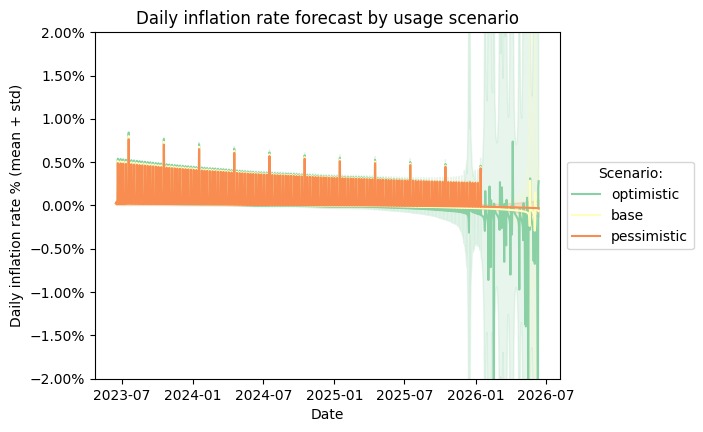

In [21]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df.iloc[::-1], x="date", y="day_inflation", hue="usage_scenario", 
                   errorbar="sd", palette="Spectral_r")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(-0.02, 0.02)
plt.title("Daily inflation rate forecast by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Daily inflation rate % (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

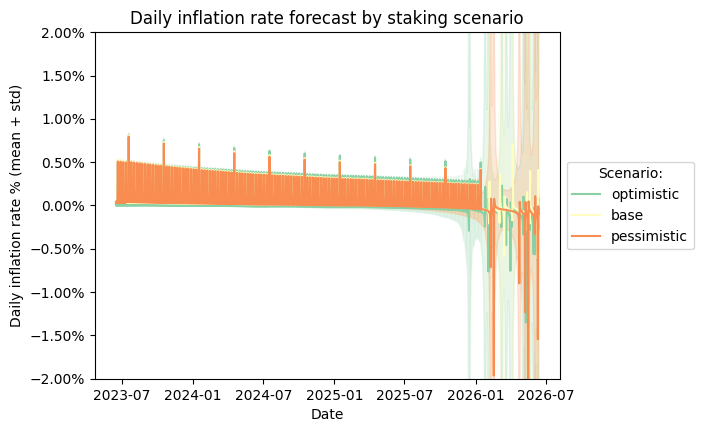

In [22]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df.iloc[::-1], x="date", y="day_inflation", hue="staking_scenario",
                   errorbar="sd", palette="Spectral_r")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(-0.02, 0.02)
plt.title("Daily inflation rate forecast by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Daily inflation rate % (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

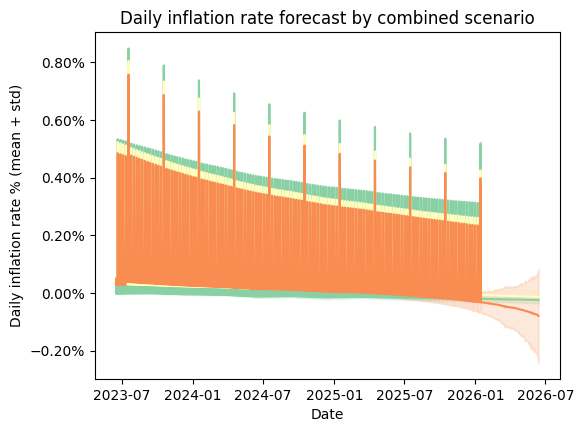

In [23]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df.iloc[::-1], x="date", y="day_inflation", 
                   hue="token_scenario", errorbar="sd", palette="Spectral_r")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Daily inflation rate forecast by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Daily inflation rate % (mean + std)")
fig.get_legend().remove()
plt.show()

## Supply components (cumulative)

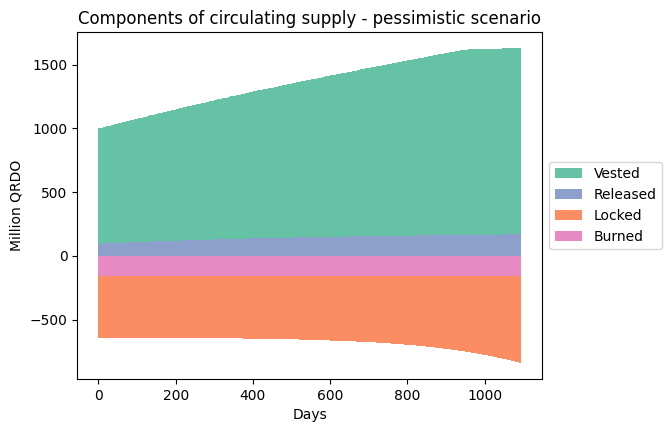

In [24]:
scenario = "pessimistic"
# Data
cols = ['day_burned', 'day_vested', 'day_locked', 'day_released']
filter_df = combined_df[combined_df["token_scenario"]==scenario].copy()
temp_df = filter_df.groupby("iteration")[cols].mean().reset_index()
temp_df['day_burned'] = -temp_df['day_burned']
temp_df['day_locked'] = -temp_df['day_locked']
cum_df = temp_df[cols].cumsum()
release = cum_df['day_released']
vest = cum_df['day_vested'] + release
burn = cum_df["day_burned"]
lock = cum_df['day_locked'] + burn

# Plot
bar_width = 1
plt.figure(figsize=(6,4.5))
plt.bar(temp_df["iteration"], vest, label="Vested", width=bar_width, color="#66c2a5")
plt.bar(temp_df["iteration"], release, label='Released', width=bar_width, color="#8da0cb")
plt.bar(temp_df["iteration"], lock, label="Locked", width=bar_width, color="#fc8d62")
plt.bar(temp_df["iteration"], burn, label="Burned", width=bar_width, color="#e78ac3")
plt.ylabel("Million QRDO")
plt.xlabel("Days")
plt.title(f"Components of circulating supply - {scenario} scenario")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

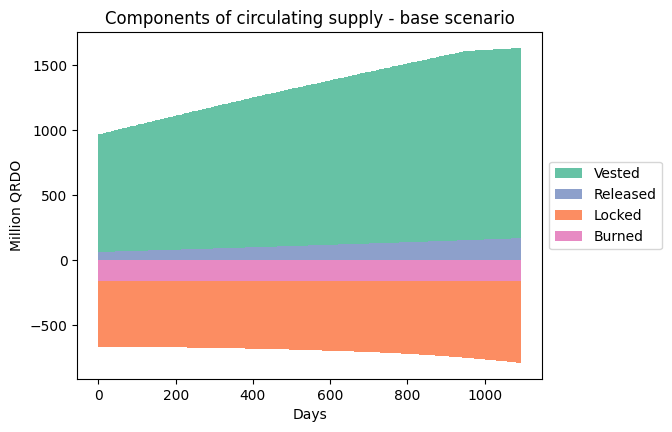

In [25]:
scenario = "base"
# Data
cols = ['day_burned', 'day_vested', 'day_locked', 'day_released']
filter_df = combined_df[combined_df["token_scenario"]==scenario].copy()
temp_df = filter_df.groupby("iteration")[cols].mean().reset_index()
temp_df['day_burned'] = -temp_df['day_burned']
temp_df['day_locked'] = -temp_df['day_locked']
cum_df = temp_df[cols].cumsum()
release = cum_df['day_released']
vest = cum_df['day_vested'] + release
burn = cum_df["day_burned"]
lock = cum_df['day_locked'] + burn

# Plot
bar_width = 1
plt.figure(figsize=(6,4.5))
plt.bar(temp_df["iteration"], vest, label="Vested", width=bar_width, color="#66c2a5")
plt.bar(temp_df["iteration"], release, label='Released', width=bar_width, color="#8da0cb")
plt.bar(temp_df["iteration"], lock, label="Locked", width=bar_width, color="#fc8d62")
plt.bar(temp_df["iteration"], burn, label="Burned", width=bar_width, color="#e78ac3")
plt.ylabel("Million QRDO")
plt.xlabel("Days")
plt.title(f"Components of circulating supply - {scenario} scenario")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

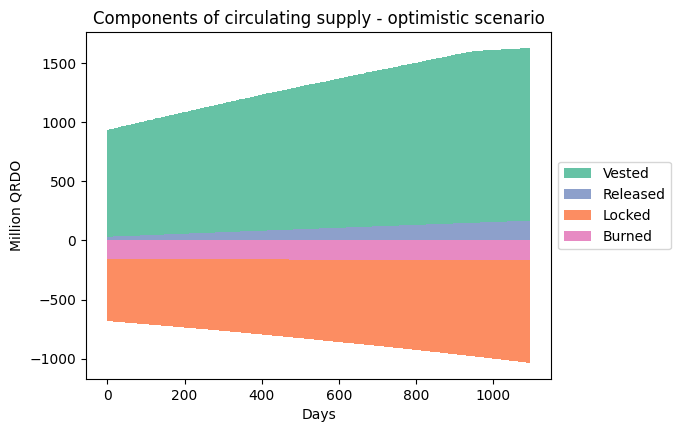

In [26]:
scenario = "optimistic"
# Data
cols = ['day_burned', 'day_vested', 'day_locked', 'day_released']
filter_df = combined_df[combined_df["token_scenario"]==scenario].copy()
temp_df = filter_df.groupby("iteration")[cols].mean().reset_index()
temp_df['day_burned'] = -temp_df['day_burned']
temp_df['day_locked'] = -temp_df['day_locked']
cum_df = temp_df[cols].cumsum()
release = cum_df['day_released']
vest = cum_df['day_vested'] + release
burn = cum_df["day_burned"]
lock = cum_df['day_locked'] + burn

# Plot
bar_width = 1
plt.figure(figsize=(6,4.5))
plt.bar(temp_df["iteration"], vest, label="Vested", width=bar_width, color="#66c2a5")
plt.bar(temp_df["iteration"], release, label='Released', width=bar_width, color="#8da0cb")
plt.bar(temp_df["iteration"], lock, label="Locked", width=bar_width, color="#fc8d62")
plt.bar(temp_df["iteration"], burn, label="Burned", width=bar_width, color="#e78ac3")
plt.ylabel("Million QRDO")
plt.xlabel("Days")
plt.title(f"Components of circulating supply - {scenario} scenario")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Supply components (daily)

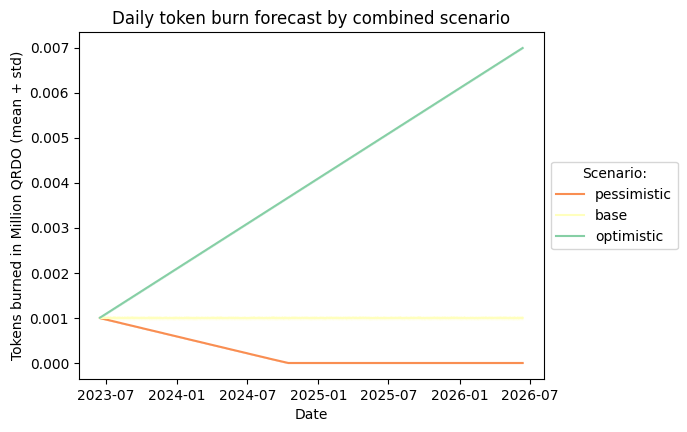

In [27]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df[combined_df["iteration"]>0], x="date", y="day_burned", 
                   hue="token_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Daily token burn forecast by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Tokens burned in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

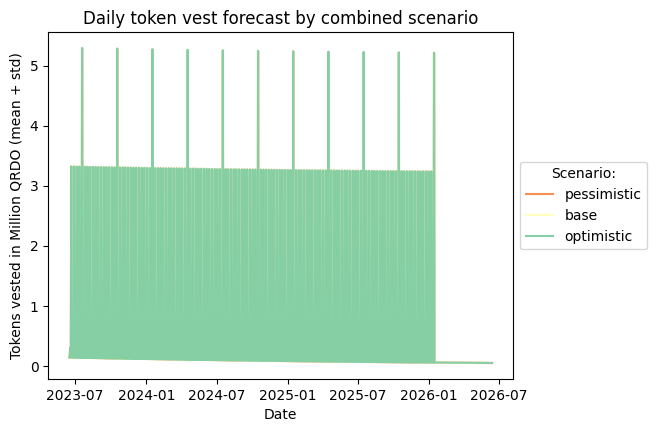

In [28]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df[combined_df["iteration"]>0], x="date", y="day_vested", 
                   hue="token_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Daily token vest forecast by combined scenario") 
plt.xlabel("Date")
plt.ylabel("Tokens vested in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

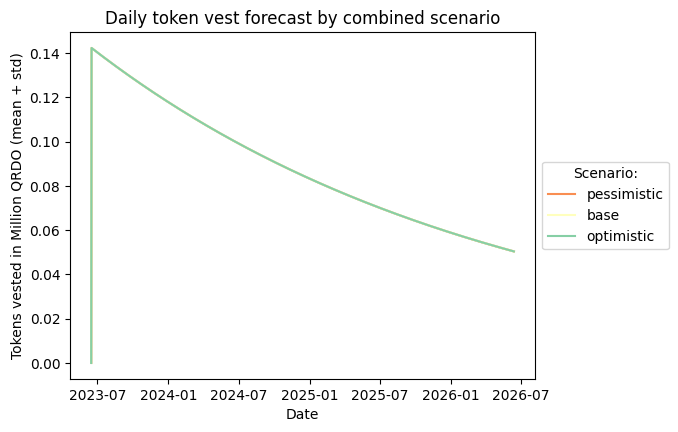

In [29]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df, x="date", y="staking_rewards_vested", 
                   hue="token_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Daily token vest forecast by combined scenario") 
plt.xlabel("Date")
plt.ylabel("Tokens vested in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

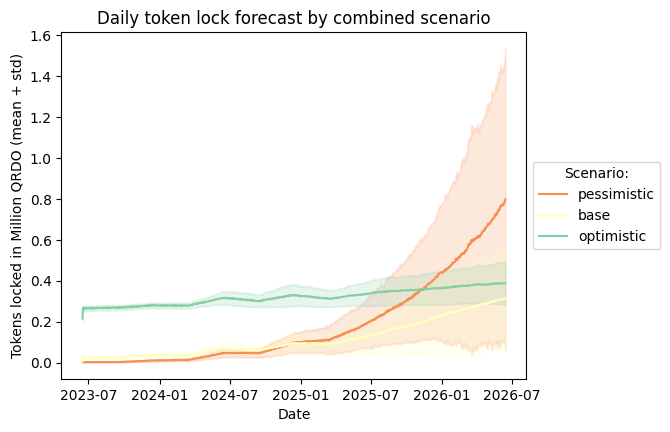

In [30]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df[combined_df["iteration"]>0], x="date", y="day_locked", 
                   hue="token_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Daily token lock forecast by combined scenario") 
plt.xlabel("Date")
plt.ylabel("Tokens locked in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

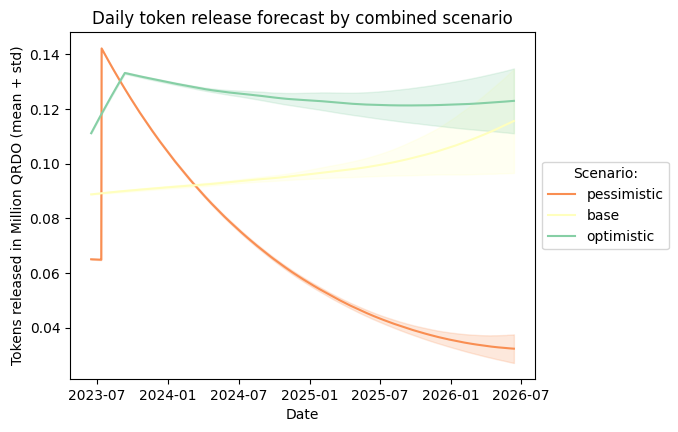

In [31]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df[combined_df["iteration"]>0], x="date", y="day_released", 
                   hue="token_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Daily token release forecast by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Tokens released in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

In [32]:
df[df["iteration"]==0][["circ_supply", 'day_vested', 'day_locked', 'day_released','day_burned']].mean()

circ_supply     644.941665
day_vested      905.000000
day_locked      503.057735
day_released     64.000400
day_burned      160.001000
dtype: float64

In [33]:
df[df["iteration"]==0][["circ_supply", 'day_vested', 'day_locked', 'day_released','day_burned']].std()

circ_supply     30.541681
day_vested       0.000000
day_locked      15.802435
day_released    26.132894
day_burned       0.000018
dtype: float64

## TVL rate

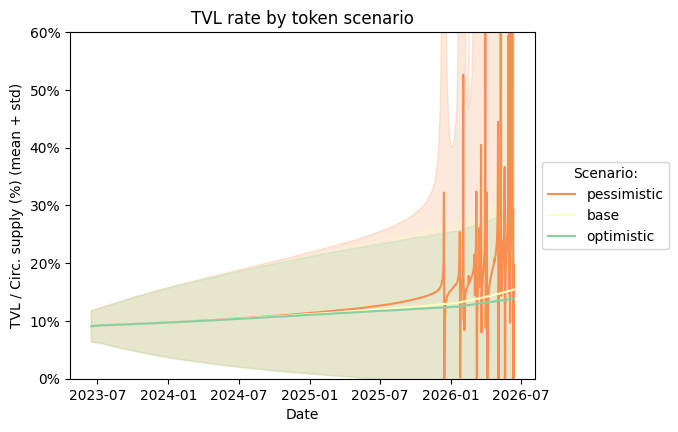

In [34]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="tvl_rate", hue="token_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(0,0.6)
plt.title("TVL rate by token scenario") 
plt.xlabel("Date") 
plt.ylabel("TVL / Circ. supply (%) (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

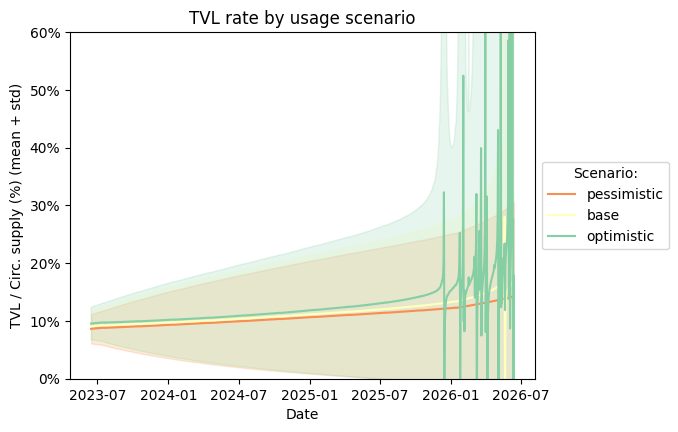

In [35]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="tvl_rate", hue="usage_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(0,0.6)
plt.title("TVL rate by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("TVL / Circ. supply (%) (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

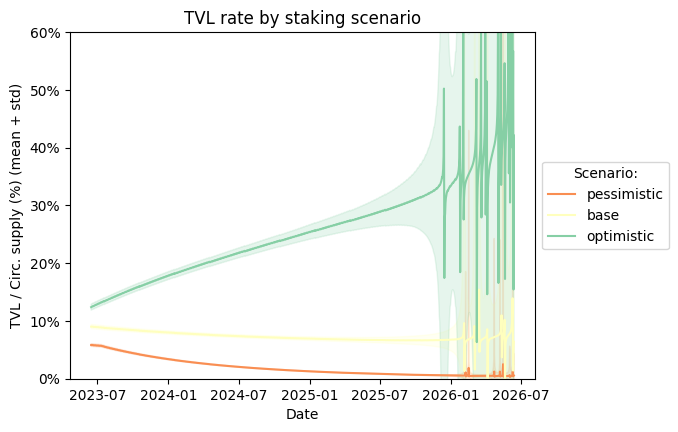

In [36]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="tvl_rate", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(0,0.6)
plt.title("TVL rate by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("TVL / Circ. supply (%) (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

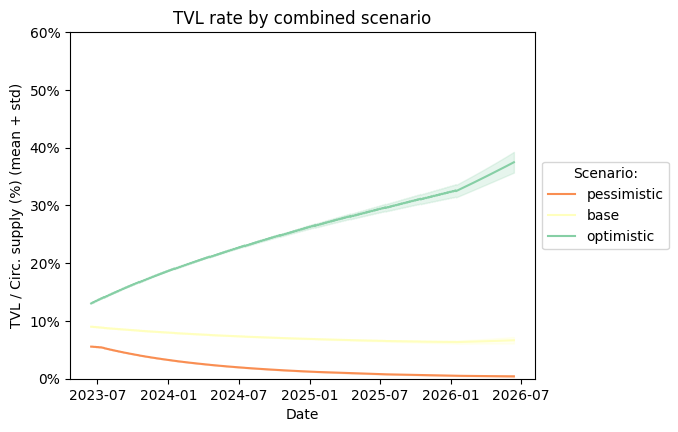

In [37]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df, x="date", y="tvl_rate", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("TVL rate by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("TVL / Circ. supply (%) (mean + std)")
plt.ylim(0,0.6)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

## Staker APR

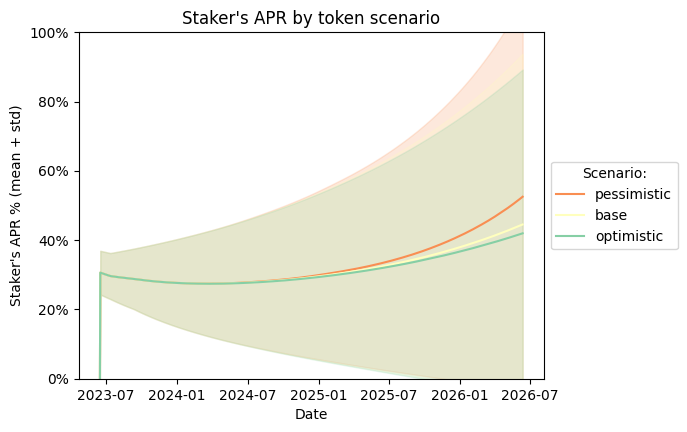

In [38]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="apr", hue="token_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(0,1)
plt.title("Staker's APR by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Staker's APR % (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

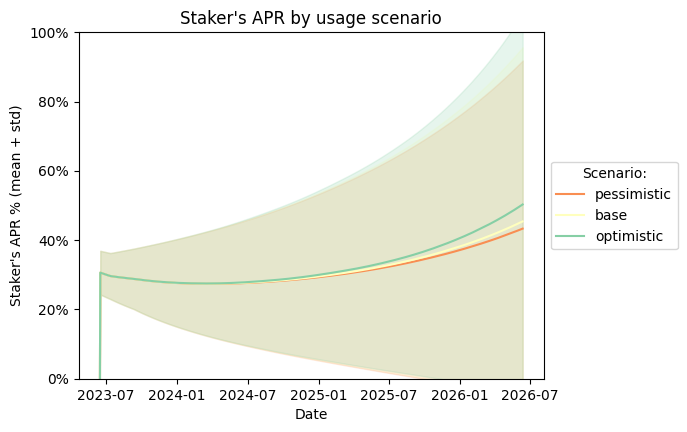

In [39]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="apr", hue="usage_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(0,1)
plt.title("Staker's APR by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Staker's APR % (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

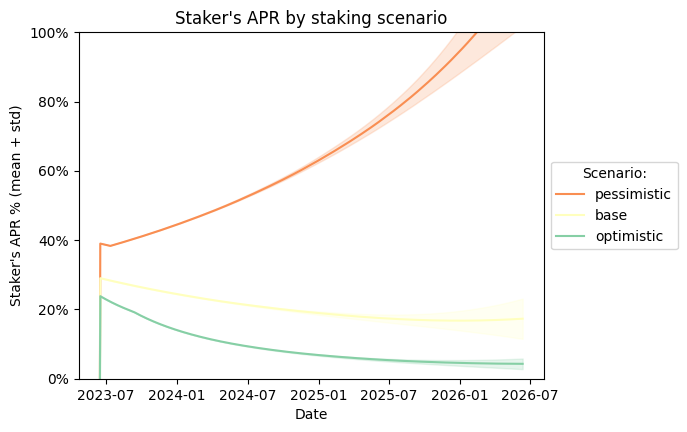

In [40]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="apr", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(0,1)
plt.title("Staker's APR by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Staker's APR % (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

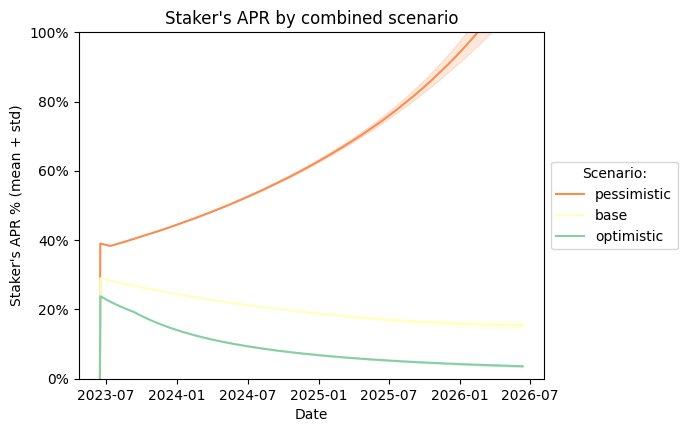

In [41]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df, x="date", y="apr", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(0,1)
plt.title("Staker's APR by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Staker's APR % (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

## Staker minimum weekly rewards

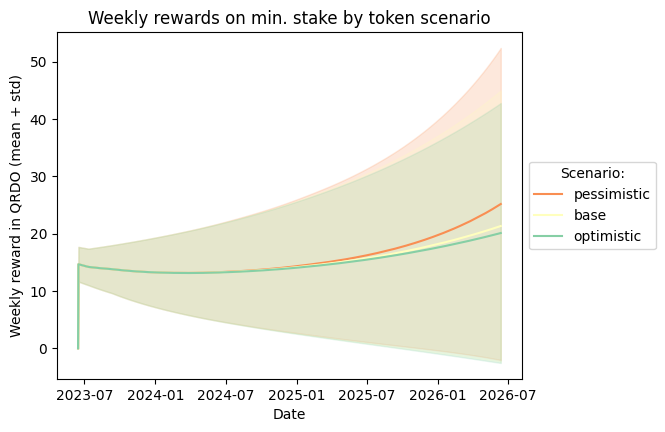

In [42]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="min_staker_week_reward", hue="token_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Weekly rewards on min. stake by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Weekly reward in QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

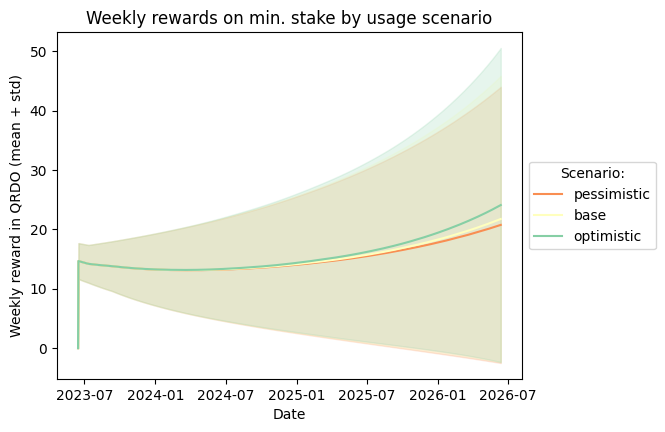

In [43]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="min_staker_week_reward", hue="usage_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Weekly rewards on min. stake by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Weekly reward in QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

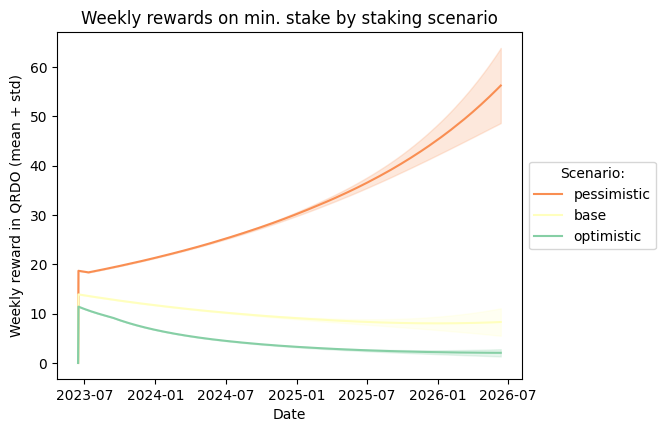

In [44]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="min_staker_week_reward", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Weekly rewards on min. stake by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Weekly reward in QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

In [45]:
df[df["iteration"]==1].groupby("staking_scenario")["apr"].mean()

staking_scenario
base           0.290112
optimistic     0.238257
pessimistic    0.390020
Name: apr, dtype: float64

In [46]:
df[df["iteration"]==729].groupby("staking_scenario")["apr"].mean()

staking_scenario
base           0.174799
optimistic     0.054715
pessimistic    0.747067
Name: apr, dtype: float64

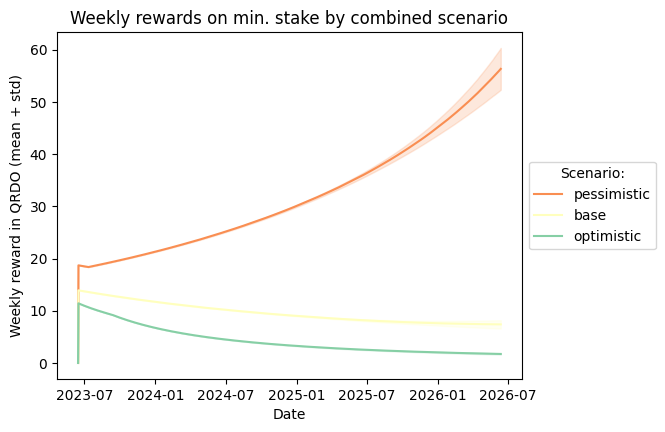

In [47]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df, x="date", y="min_staker_week_reward", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Weekly rewards on min. stake by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Weekly reward in QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

## Average rewards per validator

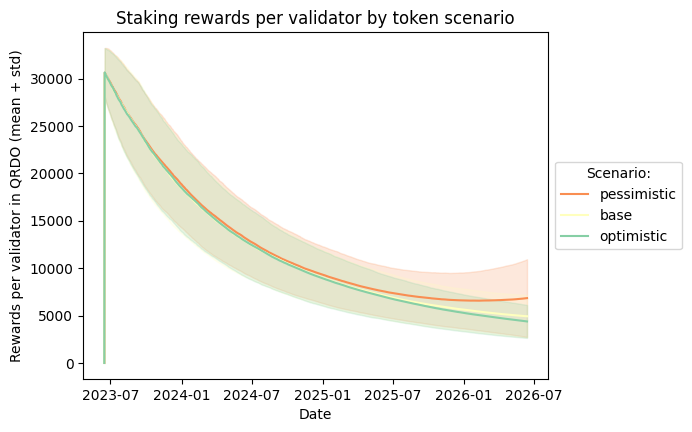

In [48]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="av_validator_reward", hue="token_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Staking rewards per validator by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Rewards per validator in QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

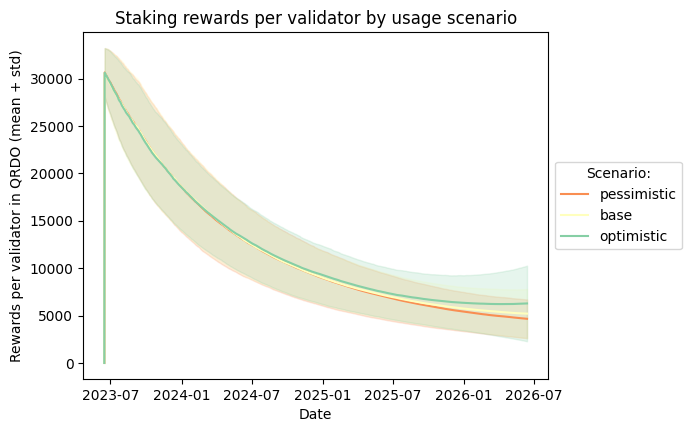

In [49]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="av_validator_reward", hue="usage_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Staking rewards per validator by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Rewards per validator in QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

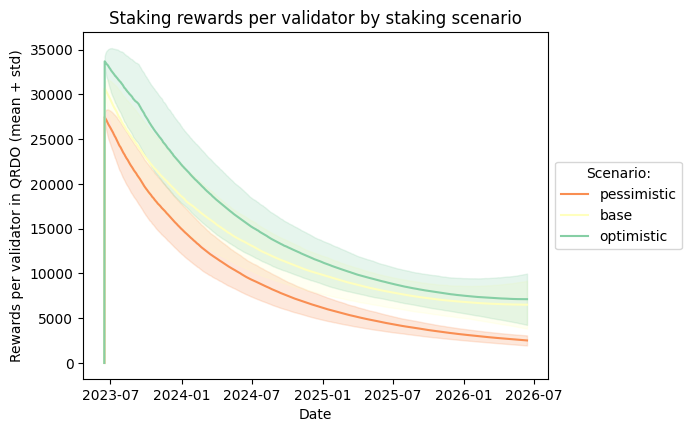

In [50]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="av_validator_reward", hue="staking_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Staking rewards per validator by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Rewards per validator in QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

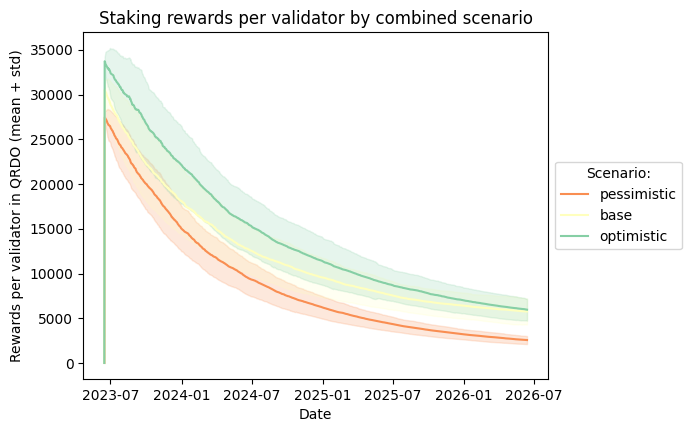

In [51]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df, x="date", y="av_validator_reward", hue="staking_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Staking rewards per validator by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Rewards per validator in QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

## Validator profit

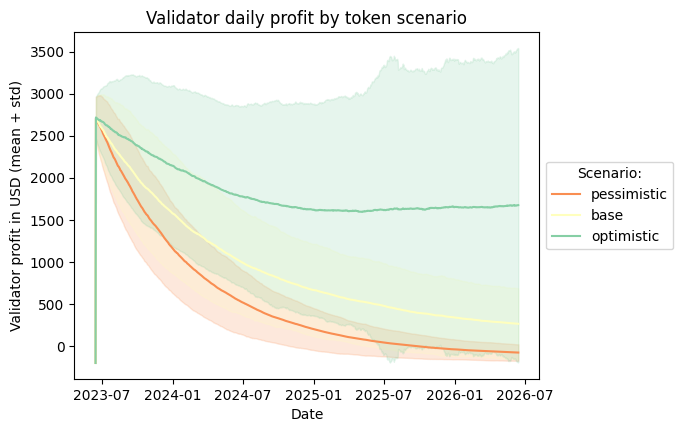

In [52]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="validator_profit", hue="token_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Validator daily profit by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Validator profit in USD (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

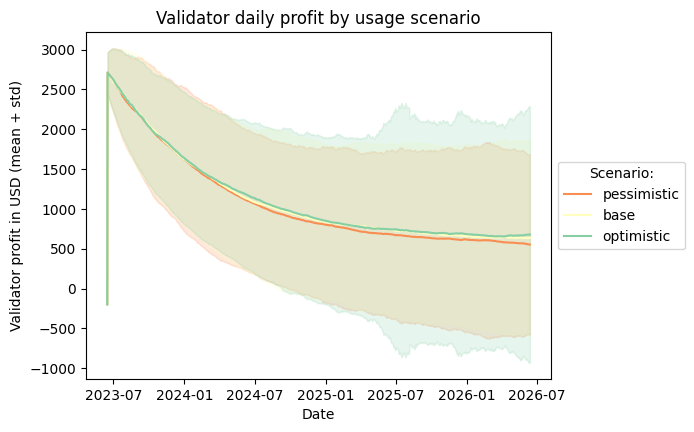

In [53]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="validator_profit", hue="usage_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Validator daily profit by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Validator profit in USD (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

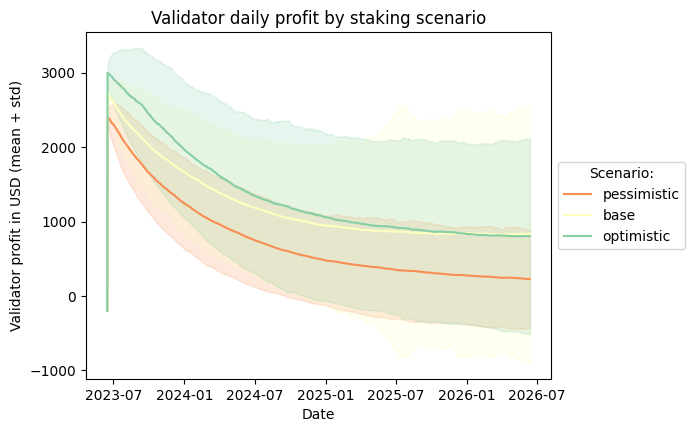

In [54]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="validator_profit", hue="staking_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Validator daily profit by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Validator profit in USD (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

In [55]:
df[df["iteration"]==1].groupby("staking_scenario")["validator_profit"].mean()

staking_scenario
base           2714.929837
optimistic     3001.724489
pessimistic    2412.532754
Name: validator_profit, dtype: float64

In [56]:
df[df["iteration"]==729].groupby("staking_scenario")["validator_profit"].mean()

staking_scenario
base           868.252319
optimistic     932.313518
pessimistic    364.289666
Name: validator_profit, dtype: float64

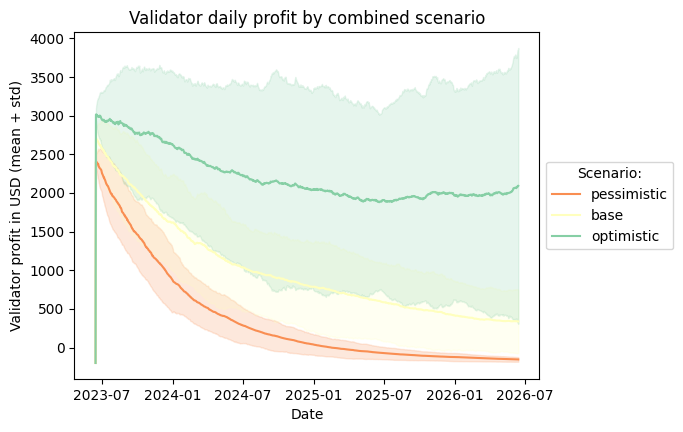

In [57]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df, x="date", y="validator_profit", hue="usage_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.title("Validator daily profit by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Validator profit in USD (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

In [58]:
combined_df[combined_df["iteration"]==1].groupby("staking_scenario")["validator_profit"].mean()

staking_scenario
base           2699.715914
optimistic     3012.063059
pessimistic    2400.675135
Name: validator_profit, dtype: float64

In [59]:
combined_df[combined_df["iteration"]==729].groupby("staking_scenario")["validator_profit"].mean()

staking_scenario
base            605.831471
optimistic     1889.058345
pessimistic     -65.166372
Name: validator_profit, dtype: float64

## Ecosystem fund balance

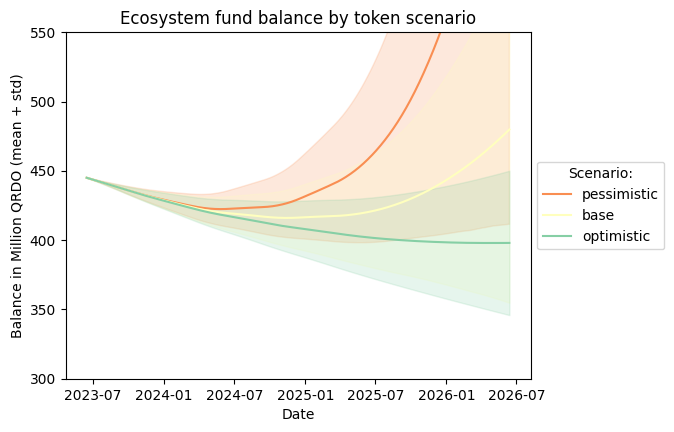

In [60]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="ecosystem_fund", hue="token_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(300,550)
plt.title("Ecosystem fund balance by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Balance in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

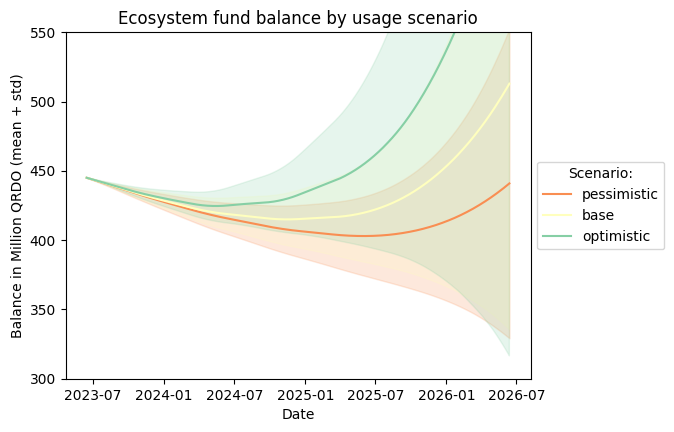

In [61]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="ecosystem_fund", hue="usage_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(300,550)
plt.title("Ecosystem fund balance by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Balance in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

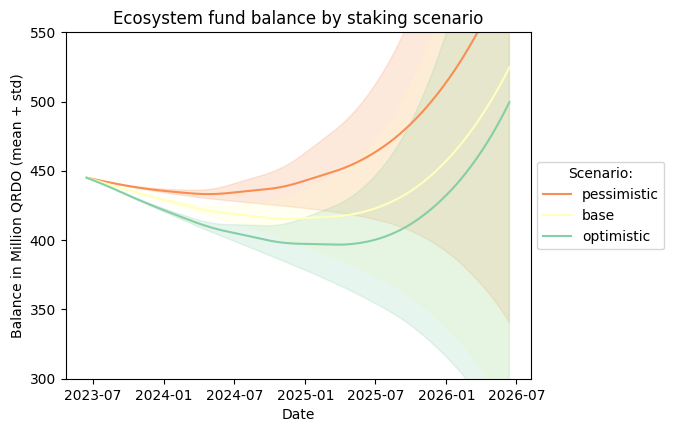

In [62]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="ecosystem_fund", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(300,550)
plt.title("Ecosystem fund balance by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Balance in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

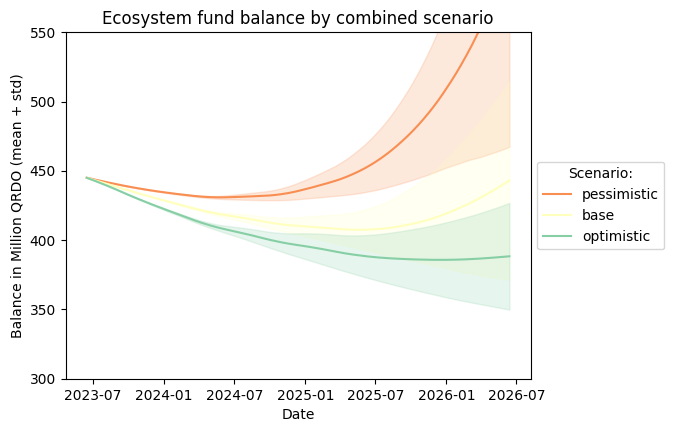

In [63]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df, x="date", y="ecosystem_fund", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=month_int))
plt.ylim(300,550)
plt.title("Ecosystem fund balance by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Balance in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

## Ecosystem fund net flows

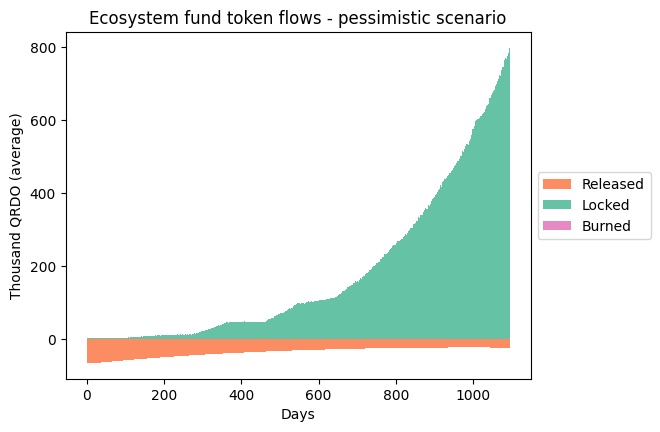

In [64]:
scenario = "pessimistic"
protocol_funded_rate = 0.8
# Data
cols = ['staking_rewards_ecosystem', 'day_service_fee_locked','protocol_burn_fees']
filter_df = combined_df[combined_df["token_scenario"]==scenario].copy()
filter_df['protocol_burn_fees'] = filter_df['day_burn_fees'] * protocol_funded_rate
temp_df = filter_df.groupby("iteration")[cols].mean().reset_index()
burn = -temp_df["protocol_burn_fees"]
release = -temp_df['staking_rewards_ecosystem']+burn
lock = temp_df['day_service_fee_locked']

# Plot
bar_width = 1
plt.figure(figsize=(6,4.5))
plt.bar(temp_df["iteration"], release/10**3, label='Released', width=bar_width, color="#fc8d62")
plt.bar(temp_df["iteration"], lock/10**3, label="Locked", width=bar_width, color="#66c2a5")
plt.bar(temp_df["iteration"], burn/10**3, label="Burned", width=bar_width, color="#e78ac3")
plt.ylabel("Thousand QRDO (average)")
plt.xlabel("Days")
plt.title(f"Ecosystem fund token flows - {scenario} scenario")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

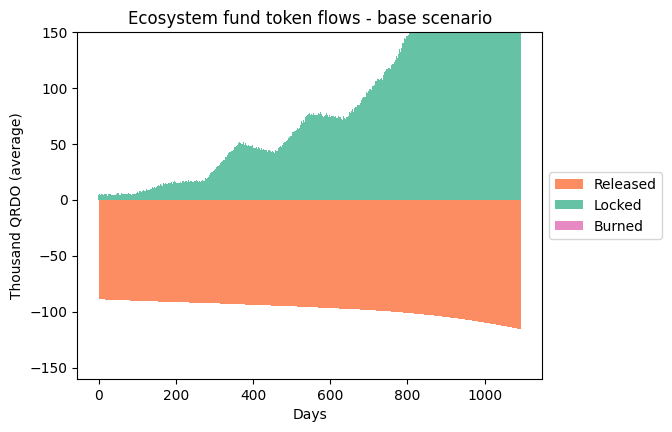

In [65]:
scenario = "base"
protocol_funded_rate = 0.5
# Data
cols = ['staking_rewards_ecosystem', 'day_service_fee_locked','protocol_burn_fees']
filter_df = combined_df[combined_df["token_scenario"]==scenario].copy()
filter_df['protocol_burn_fees'] = filter_df['day_burn_fees'] * protocol_funded_rate
temp_df = filter_df.groupby("iteration")[cols].mean().reset_index()
burn = -temp_df["protocol_burn_fees"]
release = -temp_df['staking_rewards_ecosystem']+burn
lock = temp_df['day_service_fee_locked']

# Plot
bar_width = 1
plt.figure(figsize=(6,4.5))
plt.bar(temp_df["iteration"], release/10**3, label='Released', width=bar_width, color="#fc8d62")
plt.bar(temp_df["iteration"], lock/10**3, label="Locked", width=bar_width, color="#66c2a5")
plt.bar(temp_df["iteration"], burn/10**3, label="Burned", width=bar_width, color="#e78ac3")
plt.ylabel("Thousand QRDO (average)")
plt.xlabel("Days")
plt.ylim(-160, 150)
plt.title(f"Ecosystem fund token flows - {scenario} scenario")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

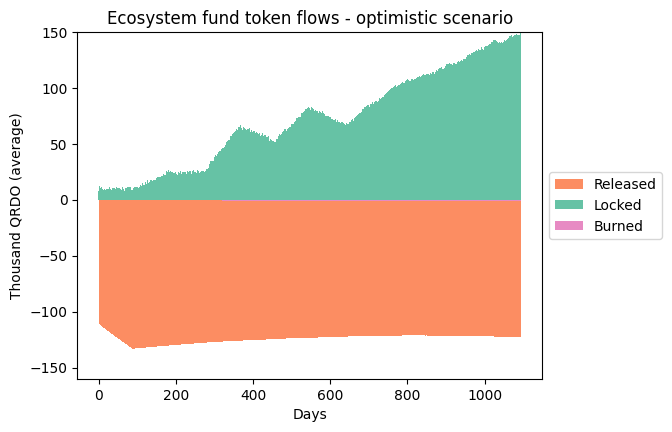

In [66]:
scenario = "optimistic"
protocol_funded_rate = 0.2
# Data
cols = ['staking_rewards_ecosystem', 'day_service_fee_locked','protocol_burn_fees']
filter_df = combined_df[combined_df["token_scenario"]==scenario].copy()
filter_df['protocol_burn_fees'] = filter_df['day_burn_fees'] * protocol_funded_rate
temp_df = filter_df.groupby("iteration")[cols].mean().reset_index()
burn = -temp_df["protocol_burn_fees"]
release = -temp_df['staking_rewards_ecosystem']+burn
lock = temp_df['day_service_fee_locked']

# Plot
bar_width = 1
plt.figure(figsize=(6,4.5))
plt.bar(temp_df["iteration"], release/10**3, label='Released', width=bar_width, color="#fc8d62")
plt.bar(temp_df["iteration"], lock/10**3, label="Locked", width=bar_width, color="#66c2a5")
plt.bar(temp_df["iteration"], burn/10**3, label="Burned", width=bar_width, color="#e78ac3")
plt.ylabel("Thousand QRDO (average)")
plt.xlabel("Days")
plt.ylim(-160, 150)
plt.title(f"Ecosystem fund token flows - {scenario} scenario")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()